<a href="https://colab.research.google.com/github/cunhajessica/Detectar_fraudes_em_cartao_de_credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by Jéssica Cunha*  

---

# **Detecção de Fraudes em Cartões de Crédito**

<p align=left>
<img src="https://img.freepik.com/vetores-gratis/avaliacao-de-credito-de-design-plano_23-2149163665.jpg?size=626&ext=jpg&ga=GA1.2.601099755.1641643709" width="60%"></p>


**Como ocorrem as fraudes em cartões de crédito?** 

A fraude ocorre quando criminosos conseguem os dados de um indivíduo e passam a realizar compras em seu nome, causando prejuízos financeiros tanto para o proprietário do cartão, como para a instituição financeira. 

Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

***E é isso que iremos abordar nesse projeto, o problema das fraudes em cartões de crédito.***

# Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas **492 fraudes** em meio a quase **284.807,00 mil transações**.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$.

<p align=center>
<img src="https://img.freepik.com/vetores-gratis/pagamento-com-cartao-de-credito-do-conceito-para-a-pagina-de-destino_52683-24923.jpg?size=338&ext=jpg&ga=GA1.2.601099755.1641643709" width="40%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos e torna os nomes das colunas anônimos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# instalar a biblioteca scikit-plot
!pip install scikit-plot -q

In [ ]:
# importar os pacotes necessários
import pandas as pd #manipulação e análise de dados
import matplotlib.pyplot as plt #visualização de dados
import seaborn as sns #visualização de dados
import scikitplot as skplt #para o grafico de confusão

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

# eliminar os warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split #para dividir os dados em treino e teste
from sklearn.preprocessing import StandardScaler #para padronizar os dados
from imblearn.under_sampling import RandomUnderSampler #para balanceamento dos dados
from sklearn.linear_model import LogisticRegression #modelo de regressão logística
from sklearn.tree import DecisionTreeClassifier #modelo de árvore de decisão
from sklearn.metrics import classification_report #metrica de desemprenho do modelo
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score #metricas de desempenho

Vamos importar o conjunto de dados usando o método `pd.read_csv()`, efetuando a leitura em um Dataframe para partirmos para a Análise exploratória dos dados.

In [ ]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

####**Tamanho do Dataset (Entradas e Variáveis)**

In [ ]:
print(f"Quantidade de ENTRADAS do dataset: {df.shape[0]}")
print(f"Quantidade de VARIÁVEIS do dataset: {df.shape[1]}")

Quantidade de ENTRADAS do dataset: 284807
Quantidade de VARIÁVEIS do dataset: 31


#Dividindo os dados em treino e teste

*   **Dados de treino:** serve para treinar o modelo, e também usaremos para fazer a análise exploratória dos dados.
*   **Dados de teste:** usado somente no final, depois de o modelo estar pronto e otimizado, para ver a real performance deste modelo.





In [ ]:
# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


O conjunto de dados foi separado conforme abaixo:


*   Dados totais: 100% (Qtd entradas: 284807 - Qtd. variáveis: 31)
*   Dados de teste: 15% (Qtd entradas: 42721 - Qtd. variáveis: 31)
*   Dados de treino: 85% (Qtd entradas: 242086 - Qtd. variáveis: 31)



Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

#Análise Exploratória

Nessa etapa vamos investigar o conjunto de dados e resumir as suas principais características. Verificando as 5 primeiras entradas do nosso Dataframe, os tipos das colunas, se há dados nulos, para posteriormente partirmos para o tratamento adequado dos dados. 


####**Verificando o Dataframe**

In [ ]:
# verificando as 5 primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Verificando as primeiras linhas já podemos ver que:
* As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original.

*  Vale lembrar que a variável `Time` está em segundos, e nela contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.

* A variável alvo está representada na coluna `Class`, onde:
    * **0 =** Transação normal; e
    * **1 =** Transação fraudulenta;

###**Tipos das variáveis**

In [ ]:
# verificando o tipo das variáveis
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Podemos ver que todas as variáveis são do tipo númerico. `float`, que são números com casas decimais e `int`que são números inteiros. Apenas a variável Class possui números inteiros.

###**Valores ausentes**

In [ ]:
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

O dataset está totalmente preenchido, ou seja, não há nenhum valor ausente ou que necessite de uma etapa de limpeza. Isso indica que antes de haver o PCA ele passou por um pré tratamento de dados.

###**Resumo estatístico das variáveis**

Devido a técnica PCA e como a maioria das variáveis estão anonimizadas, vamos verificar o resumo estatístico, por meio do método `describe()`, apenas das colunas `Time`e `Amount`.

In [ ]:
# ver o resumo estatístico do dataframe
df[["Time", "Amount"]].describe()

,Time,Amount
count,242086.000000,242086.000000
mean,94857.597379,88.612429
std,47490.660832,247.655020
min,0.000000,0.000000
25%,54234.000000,5.662500
50%,84747.000000,22.000000
75%,139362.000000,77.580000
max,172792.000000,19656.530000


Verificando acima o resumo estatístico, podemos ver que a coluna `Time` não têm nenhuma discrepância aparente. 

Em relação à variável `Amount`, notamos que o **valor médio** das transações (considerando ambas as classes) é **88.61**, a **mediana é igual a 22.00** e o **desvio padrão de 247.65**. Atingindo o **valor máximo de 19.656,53**. 

Vemos também que **75% das transações possue o valor máximo de 77,58** o que indica que as fraudes ocorrem em sua maioria com um valor monetário baixo. Já era esperado que fossem feitas dessa forma para dificultar a descoberta do furto.

O valor mínimo de transação bancária consta o valor 0,00 o que pode indicar algum erro do dataset, sendo assim, vamos analisar especificamente as transações com o valor zerado.

###**Transações que estão com o valor zerado**

In [ ]:
#verificando a quantidade de transações com valor zero
amount_zero = (df["Amount"] == 0).sum()
print(f"Quantidade total de transações com valor zero: {amount_zero}")

#verificando a porcentagem de transações com valor zero
amount_zerop = ((df["Amount"] == 0).sum() / df.shape[0])
print(f"Porcentagem de transações com valor zero: {amount_zerop* 100:.2f}%")

Quantidade total de transações com valor zero: 1559
Porcentagem de transações com valor zero: 0.64%


Verificamos que apenas 0,64% do conjunto de dados representam as transações com valor zerado. Como a quantidade é muito pequena e não há informações disponíveis sobre esse tipo de transação e o porquê de estar zerado, vamos manter esses dados como estão, com o valor em "0".

###**Verificando se os dados estão balanceados**



0    241668
1       418
Name: Class, dtype: int64

As Fraudes representam 0.1727% do dataset.



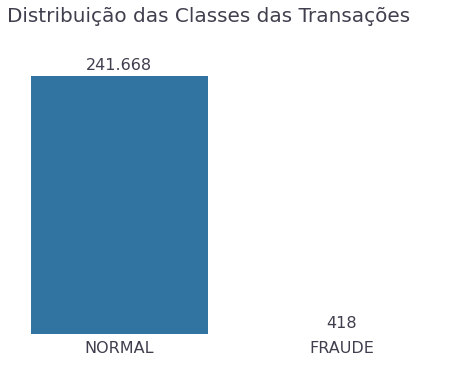

In [ ]:
# ver o balanceamento das Classes
print(df.Class.value_counts())
print('\nAs Fraudes representam {:.4f}% do dataset.\n'.format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(df['Class'])
ax.set_frame_on(False)
ax.set_title('Distribuição das Classes das Transações', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['NORMAL', 'FRAUDE'], fontsize=16, color='#3f3f4e')
ax.set_xlabel(' ')

for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 5000,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16, color='#3f3f4e')

O gráfico de barras acima, mostra que há uma enorme discrepância entre as transações, nem é possível observarmos a barra das transações fraudulentas. Na prática, isso interfere no desempenho do modelo, e será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

###**Histograma comparando as transações ao longo do tempo**

Plotamos também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo (`Time`). Notamos 2 quedas nas transações normais, que podem ser referente ao período noturno, no entanto, não foi identificada nenhum padrão das informações que difere as classes a partir das distribuições da frequência abaixo.

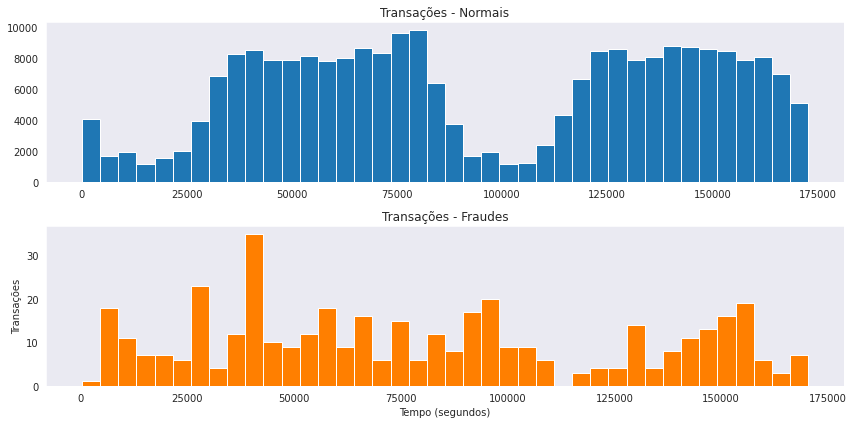

In [ ]:
# comparando as transações normal(0) e fraude(1) ao longo tempo do utilizando histograma
laranja= '#FF7F00'

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

num_bins = 40

ax[0].hist(df.Time[df.Class==0], bins=num_bins)
ax[0].set_title('Transações - Normais')

ax[1].hist(df.Time[df.Class==1], bins=num_bins, color=laranja)
ax[1].set_title('Transações - Fraudes')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

###**Histograma comparando as transações referente a variável Amount**

Agora vamos comparar as transações (Normais e Fraudes) em relação ao valor.

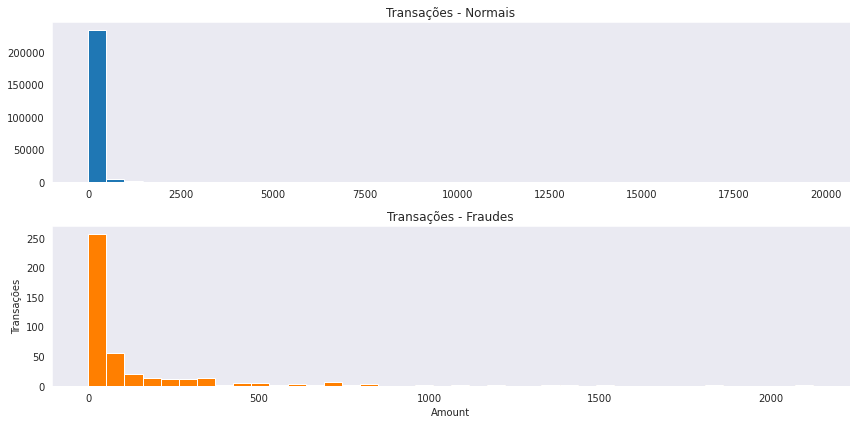

In [ ]:
# comparando os valores das transações normal(0) e fraude(1) utilizando histograma

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins=40

ax[0].hist(df.Amount[df.Class==0], bins=num_bins)
ax[0].set_title('Transações - Normais')

ax[1].hist(df.Amount[df.Class==1], bins=num_bins, color=laranja)
ax[1].set_title('Transações - Fraudes')

plt.xlabel('Amount')
plt.ylabel('Transações')
plt.tight_layout()

O que é possivel observar é que a maioria das fraudes possui um valor abaixo de 500 libras, porém, algumas chegam próximas de 1000 libras. 

###**Verificando os outliers**

Seguindo a análise exploratória, vamos plotar os *boxplots* para ver se há alguma diferença no padrão transações em relação à dimensão `Amount`.



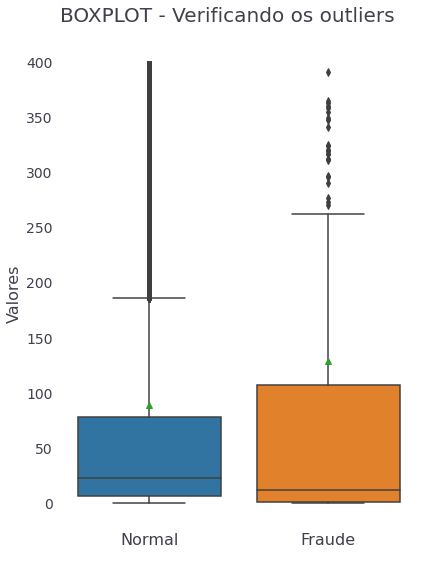

In [ ]:
# plotando boxplot para a variável Amount

fig, ax = plt.subplots(figsize=(6, 8), sharex=True)
ax.set_frame_on(False)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
ax.set_title('BOXPLOT - Verificando os outliers', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
plt.ylim((-20, 400))
plt.yticks(fontsize=14, color='#3f3f4e')
ax.set_ylabel('Valores', fontsize=16, color='#3f3f4e')
plt.xticks([0, 1], ['Normal', 'Fraude'], fontsize=16, color='#3f3f4e')
ax.set_xlabel(' ')

plt.tight_layout()


Vamos ver também, as informações estatísticas para cada classe (Normal e Fraude).

In [ ]:
# Descrição estatística das transações Normais
df['Amount'][df['Class']==0].describe().round(2)

count    241668.00
mean         88.54
std         247.61
min           0.00
25%           5.70
50%          22.00
75%          77.50
max       19656.53
Name: Amount, dtype: float64

In [ ]:
# Descrição estatística das transações Fraudulentas
df['Amount'][df['Class']==1].describe().round(2)

count     418.00
mean      128.50
std       267.73
min         0.00
25%         1.00
50%        11.86
75%       106.81
max      2125.87
Name: Amount, dtype: float64

As informações estatísticas para as transações fraudulentas mostram que a sua média está em 128.50 e o valor máximo em 2125,87.
Já para as transações normais, a média é 88,54 e o máximo 19656.53.

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *machine learning*.



###**Gráfico de densidade da variável das transações**

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis V3, V4, V10 e V11, como elas são bem distintas.

A cor laranja refere-se as transações de fraude e a azul de transações autênticas.

Por outro lado, variáveis como V8, V13 e V15 são muito similares, apresentando aproximadamente o mesmo comportamento.

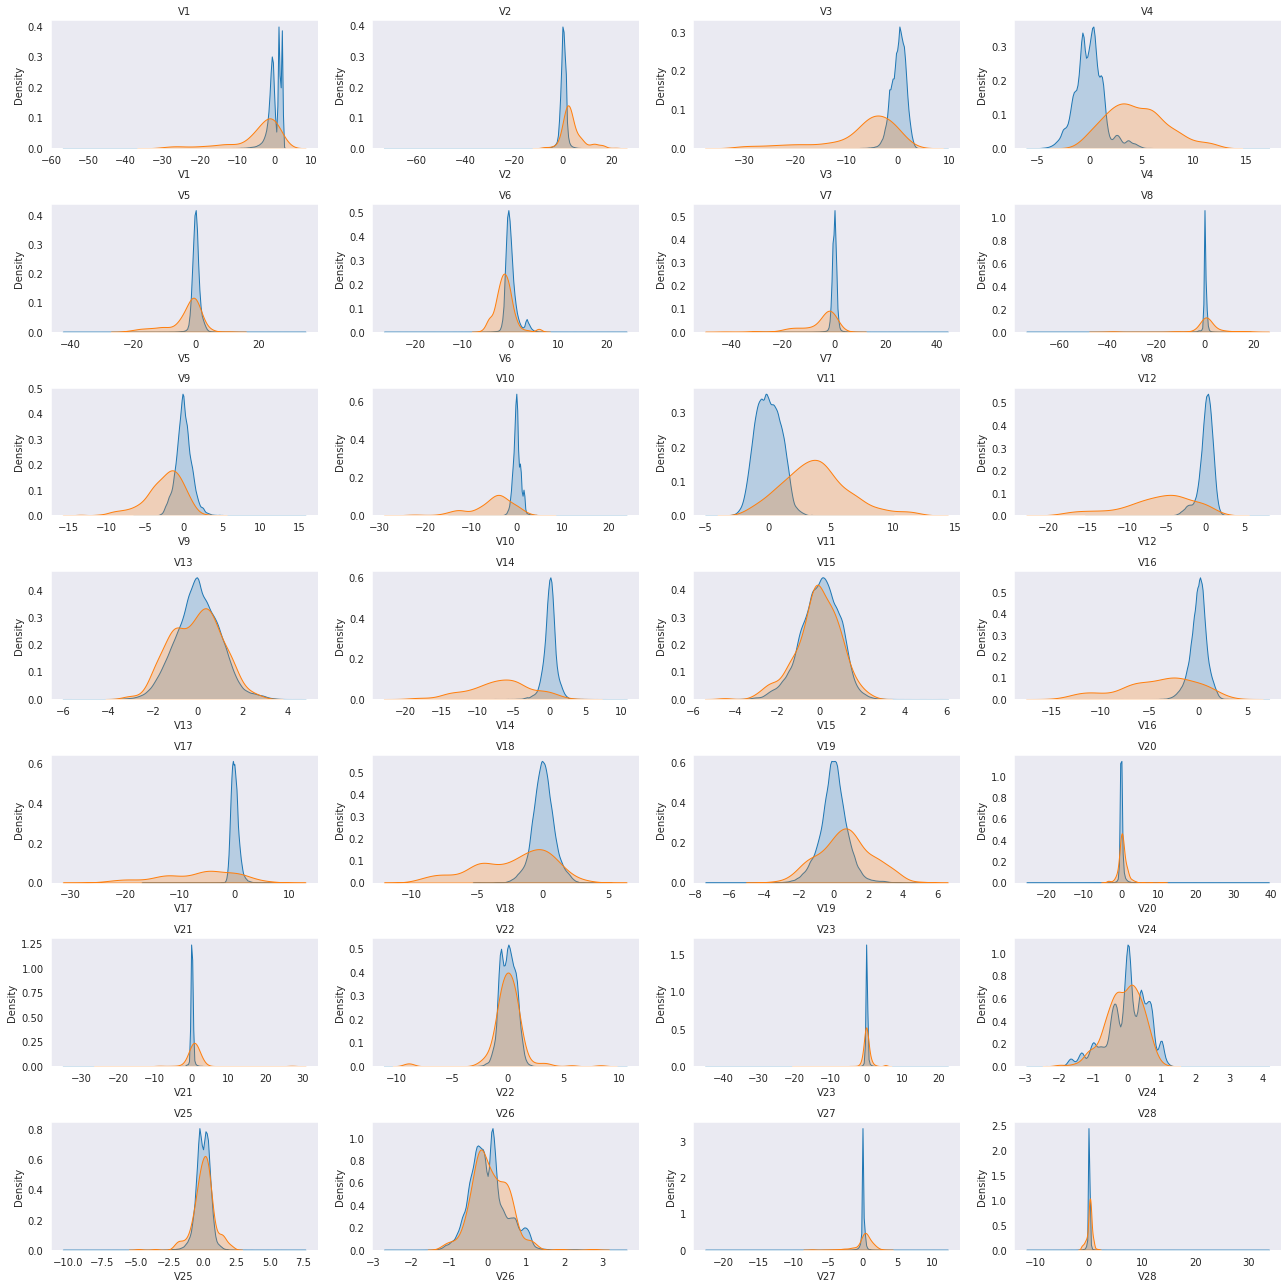

In [ ]:
# gráfico de densidades

colunas = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(colunas)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18, 18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label="Class=0", shade=True)
  sns.kdeplot(df_class_1[col], label="Class=1", shade=True)
  plt.title(col, fontsize=10)
  
plt.tight_layout()

###**Resumo da análise exploratória**



*   O dataset possui 284807 entradas e 31 variáveis.
*   Não há nenhum valor ausente nos dados.
*   Verificamos que apenas 0,64% do conjunto de dados possuem entradas com valor zerado, e por não saber o porquê deles existirem, optamos por deixa-los no dataset.
*   As informações estatísticas para as transações fraudulentas mostram que a sua média está em 128.50 e o valor máximo em 2125,87.
*   As transações normais, a média é 88,54 e o máximo 19656.53.
*   As variáveis V3, V4, V10 e V11 são bem distintas em relação as transações autênticas e fraudulentas.
*   O conjunto de dados possui **492 fraudes** em **284.315,00 mil transações normais**.
*   É um conjunto de dados extremamente desbalanceado, onde **as fraudes representam apenas 0,17% do total**.
*   Como somente 0,17% dos dados são fraudes será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.






# Preparação dos Dados

*O que vamos fazer para preparar os dados?*

*   **Padronizar** as features Time e Amount, que estão em outra ordem de grandeza.
*   **Dividir** entre dados de treino e validação.
*   **Balancear** os dados a fim de evitar uma baixa performance para o modelo e overfitting*.

<font size="2.8">*Overfitting: é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.</font>


##**Padronizar**

Essa etapa tem o objetivo de redimencionar os dados, para que venham a ter a mesma ordem de grandeza, a mesma escala. Os dados permanecem os mesmos, a mudança é somente para uma escala em comum. É importante para evitar que o algoritmo fique enviesado para as variáveis com maior ordem de grandeza.

Iremos Padronizar as variáveis `Time` e `Amount` usando a classe **`StandardScaler`**.

In [ ]:
# padronizar as variáveis Time e Amount

df_clean = df.copy()
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


##**Dividir entre conjuntos de Treino e Validação**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre Treino e Validação. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.


*   **Dados de treino:** como mencionamos anteriormente, é usado para treinar o modelo.
*   **Dados de validação:** utilizado para avaliar o desempenho de cada modelo e hiperparâmetros.

Antes de dividir os dados de treino e validação, temos que **especificar as variáveis ​​X e y** para a modelagem. 

*   **Variável `y`:** é a variável que estamos tentando prever. No nosso caso, a variável `Class`.
*   **Variáveis `​​X`:** são as outras variáveis, ​​independentes ou explicativas.  Sendo assim, a variável X é definida eliminando a variável `Class` do resto das variáveis escolhidas para o modelo.

In [ ]:
# separando as variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

 

*   **Stratify** = A estratificação é o processo de dividir o conjunto de dados em subgrupos homogêneos antes da amostragem. Por exemplo, se `y = Class` tiver 80% números zeros e 20% números 1, o stratify garante que os dados serão divididos contendo essa mesma proporção, tanto para os dados de treino como para os dados de validação.

*   **Shuffle** = embaralha os dados antes de dividir. Evita de treinarmos apenas metade das classes. O embaralhamento uniforme garante que cada item tenha a mesma chance de ocorrer em qualquer posição, e não ocorra uma pré determinação das posições dos elementos, sobre o resultado.

*Se o stratify=True, necessita mencionar shuffle=True.*

*Se shuffle=False então stratify=None.*

##**Balanceamento dos dados**

Essa etapa é necessária, pois como vimos anteriormente os dados estão desbalanceados. Dados desbalanceados são aqueles em que há um desvio severo na distribuição de classes, como ocorre no nosso dataset que apenas 0,17% dos dados referem-se a transações de fraude, sendo necessário, então, fazer o Balanceamento dos dados.

É importante efetuar o balanceamento dos dados porque **o conjunto de dados de treino pode influenciar muitos algoritmos de aprendizado de máquina, levando alguns a ignorar completamente a classe minoritária**. Isso é um problema, pois normalmente é a classe minoritária que desejamos fazer as previsões, no caso, as transações fraudulentas.

Para resolver o problema de desequilíbrio de classe vamos reamostrar aleatoriamente o conjunto de dados de treino. Para isso pode-se usar diversas técnicas, as técnicas mais utilizadas são Undersampling e Oversampling, as duas da biblioteca `imblearn`.

* **Random Undersampling:** Exclui aleatoriamente exemplos na classe majoritária, e é mais utilizado quando há grande volume de dados, porém, pode resultar na perda de informações para o modelo.
* **Random Oversampling:** Exemplos duplicados aleatoriamente na classe minoritária. Nenhuma informação é descartada, porém, pode resultar em perda de performance para a classe minoritária em alguns modelos.

<p align=center>
<img src="https://miro.medium.com/max/700/1*-aXoVoxBq5_wmUkkNQzPqQ.png" width="100%"></p> 
<p align=center><font size="2">Fonte: by Mars - Analytics Vidhya</font></p>


*A alteração na distribuição de classes é aplicada apenas ao conjunto de dados de treino. A intenção é influenciar o ajuste dos modelos. A reamostragem não é aplicada ao conjunto de dados de teste ou validação usado para avaliar o desempenho de um modelo.*


Neste projeto vamos optar por utilizar a técnica **Undersampling**.

Autênticas = 0
Fraudes= 1
0    313
1    313
Name: Class, dtype: int64


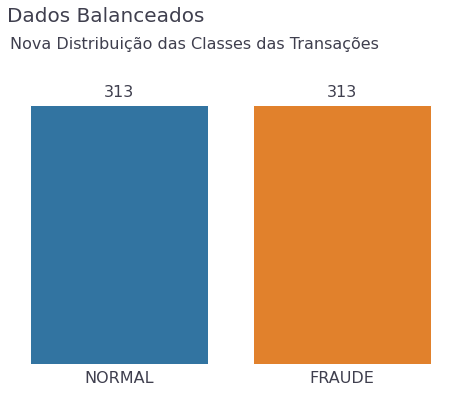

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# checar o balanceamento das classes
print('Autênticas = 0\nFraudes= 1')
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus);
ax.set_frame_on(False)
ax.set_title('Dados Balanceados', loc='left', pad=70, fontdict={'fontsize':20}, color='#3f3f4e');
fig.text(x= 0.13 , y= 1 , s='Nova Distribuição das Classes das Transações', fontsize=16, color='#3f3f4e')
#ax.set_title('Nova Distribuição das Classes das Transações', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['NORMAL', 'FRAUDE'], fontsize=16, color='#3f3f4e')
ax.set_xlabel(' ')

for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 10,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16, color='#3f3f4e')


## **Correlação dos dados**

Com a matriz de correlação abaixo, podemos notar a importância do balanceamento dos dados, pois com os dados desbalanceados a correlação das variáveis era quase inexistente.

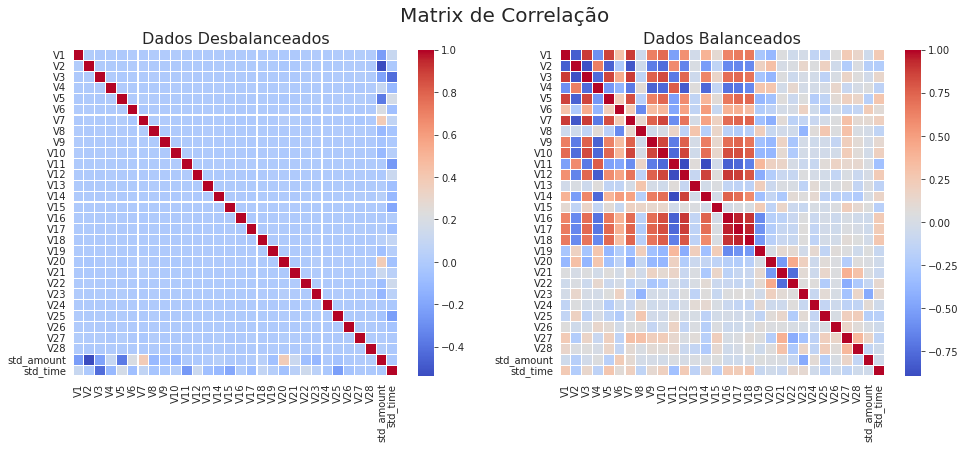

In [ ]:
# verificando a matriz de correlação
corr = X_train.corr()
corr_rus = X_rus.corr()

# gráfico de correlação
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (16,6))
fig.suptitle('Matrix de Correlação', fontsize=20)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap='coolwarm', ax=ax0)
ax0.set_title('Dados Desbalanceados', fontsize=16)

sns.heatmap(corr_rus, xticklabels=corr_rus.columns, yticklabels=corr_rus.columns, linewidths=.1, cmap='coolwarm', ax=ax1)
ax1.set_title('Dados Balanceados', fontsize=16)

plt.show()

# Modelo de Machine Learning


Após a análise exploratória e todos os dados preparados, podemos instanciar os modelos.

Os modelos de classificação que iremos analisar, serão:

*   **Modelo de Regressão Logística**
*   **Modelo de Árvore de Decisão**


## **Regressão Logística**

Esse tipo de modelo determina a probabilidade de um evento acontecer. Ele é muito utilizado em problemas de classificação, pois ele define uma categoria da outra.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`.Posteriormente, serão realizadas as previsões sobre os dados de teste.

In [ ]:
# instanciar e treinar um modelo de Regressão logística
modelrl = LogisticRegression()
modelrl.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de validação
y_pred = modelrl.predict(X_val)
y_proba = modelrl.predict_proba(X_val)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

#Avaliação do desempenho do modelo

Para verificar a performace do modelo, imprimimos o Relatório de Classificação e observamos a Matriz de Confusão. Mas pra isso, precisamos entender, cada um deles.

####**Matriz de confusão**

Matriz de confusão, é uma matriz que mostra todos os acertos e erros do modelo ao prever as classes. Ela traz a frequências dos acertos e erros do modelo.

<p align=center>
<img src="https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png" width="50%"></p> 
<p align=center><font size="2">Fonte: diegonogare.net</font></p>


*   **Positivo Verdadeiro (True Positive – TP):** O modelo previu que era positivo e realmente era. Por exemplo, uma transação fraudulenta o modelo classificou como sendo fraude.
*   **Falso Positivo (False Positive – FP)**: O modelo previu que era positivo mas não era. Por exemplo, o modelo classificou a transação como fraudulenta, porém, se tratava de uma transação autêntica.
*   **Negativo Verdadeiro (True Negative – TN)**: O modelo previu que era negativo e realmente era. Por exemplo, uma transação autêntica o modelo classificou como sendo autêntica.
*   **Falso Negativo (False Negative – FN)**: O modelo previu que era negativo mas não era. Por exemplo, o modelo classificou a transação como sendo autêntica, porém, se tratava de uma transação fraudulenta.

####**Relatório de Classificação**

Ele indica as métricas do modelo.


*   **Acurácia:** Mostra diretamente a porcentagem de acertos do modelo. (Acurácia = nº de precisões corretas / nº total de previsões)

*   **Precision:** Entre as transações classificadas como fraudes, quantas foram identificadas corretamente. (Precision = TP/TP+FP)

*   **Recall:** Entre todas as observações que são positivas(fraude) quantas o modelo conseguiu identificar como positiva. Representa a capacidade de um modelo em prever a classe positiva. ( Recall = TP/TP+FN)

*   **F1-Score:** É a média harmônica entre Precision e Recall. (F1-Score = 2*(precision * recall)/precision+recall)

*   **AUC ROC:** ROC (Receiver Operating Characteristic Curve) é a curva gerada pela taxa de verdadeiros positivos (TP) pela taxa de falsos positivos (FP) para diferentes pontos de cortes (c). A curva ROC oferece uma visão geral de um modelo e pode ser utilizada para encontrar pontos de corte ideias. O corte é feito a partir de um determinado valor, acima dele o modelo classifica como sendo uma determinada classe, e abaixo da linha de corte como sendo outra classe.

[AUC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772) é uma medida derivada da curva ROC e quer dizer *Area Under the Curve*. Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1.

Agora podemos passar para a avaliação do modelo de Regressão logística.


###**Avaliação do Modelo de Regressão logística**

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9669    0.9831     60417
           1     0.0448    0.8952    0.0854       105

    accuracy                         0.9667     60522
   macro avg     0.5223    0.9311    0.5342     60522
weighted avg     0.9982    0.9667    0.9815     60522

Acurácia: 0.9667

AUC: 0.9311



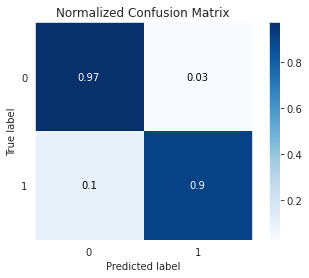

In [ ]:
# imprimir relatório de classificação
print("Relatório de Classificação: \n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4F}\n".format(roc_auc_score(y_val, y_pred)))

# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True);

##**Árvore de decisão**

Decision Tree, ou Árvore de Decisão em português, é um algoritmo de aprendizado supervisionado para Machine Learning, e pode ser usado tanto para classificação quanto para regressão.

Uma árvore de decisão geralmente começa com um único nó, que se divide em possíveis resultados, ou seja, pode ser um questionamento se dividindo em sim ou não. Cada um desses resultados leva a nós adicionais, que se ramificam em outras possibilidades. Assim, cria-se uma forma de árvore, um diagrama. 


In [ ]:
# instanciar e escolher os hyperparameters
modeldt = DecisionTreeClassifier(max_depth=5, criterion="entropy")
modeldt.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de validação
y_pred_dt = modeldt.predict(X_val)



*   **max_depth:** pode-se passar a profundidade máxima da árvore. É aconselhavel usar max_depth=3 como uma profundidade inicial da árvore para ter uma ideia de como a árvore está se ajustando aos dados e, em seguida, aumente a profundidade, caso necessário.

*   **criterion:** essa função mede a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza Gini e “entropy” para o ganho de informação, ou seja, quanto mais certo ou mais determinista for um evento, menos informação ele conterá. Em poucas palavras, a informação é um aumento na incerteza ou entropia.

###**Avaliação do Modelo de Árvore de Decisão**

              precision    recall  f1-score   support

           0     0.9998    0.9132    0.9546     60417
           1     0.0176    0.8952    0.0345       105

    accuracy                         0.9132     60522
   macro avg     0.5087    0.9042    0.4945     60522
weighted avg     0.9981    0.9132    0.9530     60522

Acurácia: 0.9132

AUC: 0.9042

AxesSubplot(0.125,0.125;0.62x0.755)


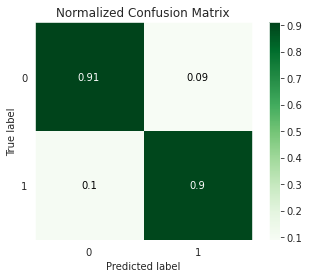

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_val, y_pred_dt, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_dt)))

# imprimir a acurácia do modelo
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_dt)))

# plotar a matrix de confusão
print(skplt.metrics.plot_confusion_matrix(y_val, y_pred_dt, normalize=True, cmap='Greens'));

É possível também **visualizar como ficou a nossa árvore** utilizando algumas bibliotecas do python. Vamos ver abaixo como ela ficou:

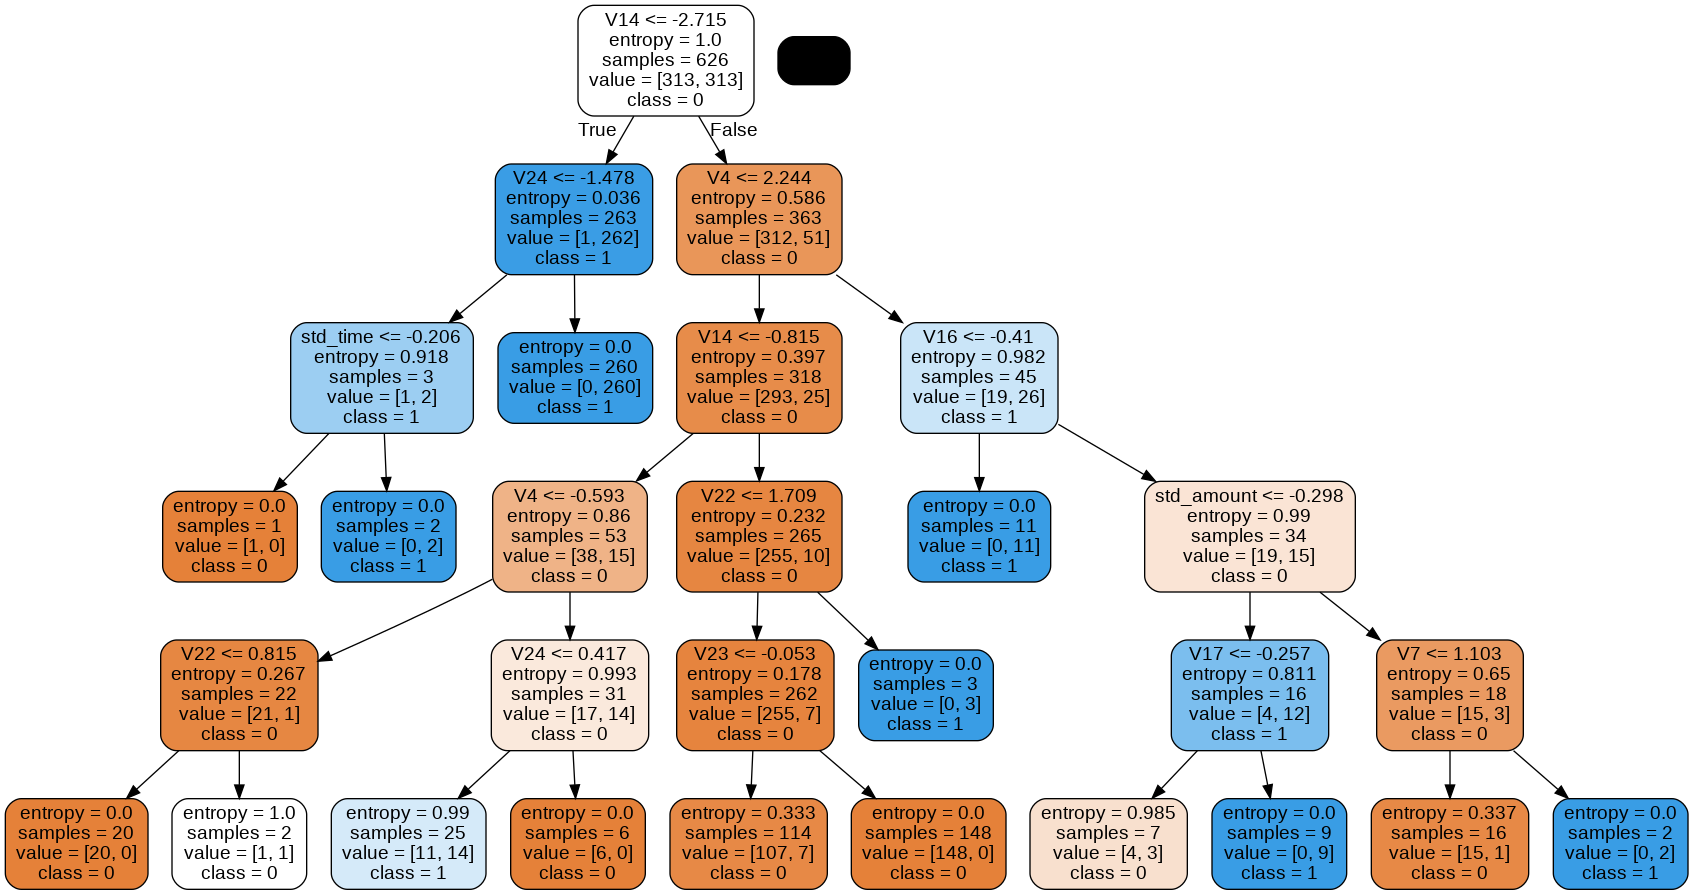

In [ ]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(modeldt, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotando o diagrama
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

#Qual o modelo com o melhor desempenho?

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada, pois pode ter uma acurácia de 99% e detectar menos de 60% das fraudes. Para entermos o desempenho do modelo observamos a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna recall do Relatório de Classificação. Uma outra métrica considerada interessante para se avaliar a eficácia é a AUC ROC.

Levando isso em consideração, o modelo com o melhor desempenho foi o de **Regressão Logística**, tendo como resultado as métricas abaixo:

* **Matriz de confusão:** considerando o conjunto total de dados o modelo conseguiu prever corretamente 97% das operações de fraude como sendo realmente fraude e 90% das transações normais como sendo realmente autênticas.
* **AUC: 93,11%** - Oferece uma visão geral de um modelo em relação aos acertos positivos e negativos (Transações - Fraude e Autêntica). 
* **Acurácia: 96.67%** - Refere-se a porcentagem de acertos do nosso modelo.
* **Recall: 89,52%** - Representa a capacidade entre todas as transações de fraude, quantas realmente o modelo conseguiu prever como fraude.



# Fazendo Previsões no Conjunto de Teste 

No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste. 

Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, e agora é hora de descobrirmos o potencial desse simples modelo com os dados de teste.

O que faremos é apenas utilizar o modelo que treinamos com um novo conjunto. Mas, para que os resultados sejam justos, **precisamos fazer com que os novos dados estejam nas mesmas condições daqueles que o nosso modelo espera**.

Nesse caso, precisamos padronizar as colunas Time e Amount pois padronizamos também nos dados de treino. Não podemos balancear os dados pois haveria perda. Nosso modelo precisa ser tratado mas precisamos fazer previsões em todas as linhas que ele receber.

In [ ]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Agora basta separar entre X e Y, e fazer nossas previsões.

In [ ]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred_test = modelrl.predict(X_test)
y_proba_test = modelrl.predict_proba(X_test)

Pronto! Com nossas previsões feitas, é hora de visualizar os resultados.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9728    0.9862     42647
           1     0.0554    0.9189    0.1045        74

    accuracy                         0.9727     42721
   macro avg     0.5276    0.9459    0.5453     42721
weighted avg     0.9982    0.9727    0.9846     42721

Acurácia: 0.9727

AUC: 0.9459



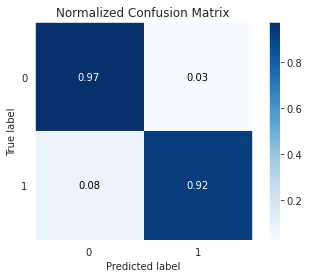

In [ ]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_test, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_test)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_test)))

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)

# Conclusões

*   Apesar dos dados estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas, os dados eram desbalanceados e foi necessário balancear os dados, para isso utilizamos a técnica Undersampling.
* Optamos por analisar dois modelos de Machine Learning, Regressão Logística e Árvore de decisão.
* O modelo de Regressão Logística foi ligeiramente melhor que o de Árvore de decisão nos dados de validação,sendo assim, utilizamos os dados de teste no modelo de Regressão Logística.
*   Nossos resultados foram pouco inferiores ao do conjunto de validação, o que é um excelente resultado. As métricas finais foram:
* **Matriz de confusão:** O modelo conseguiu prever corretamente 97% das operações de fraude como sendo realmente fraude e 92% das transações autênticas como sendo realmente autênticas.
* **AUC: 94,59%**
* **Acurácia: 97.27%** 
* **Recall: 91,89%**
* Apesar do modelo ter apresentado um bom desempenho para detecção de fraudes em cartões de crédito, ainda há espaço para melhorias. Existem outros algoritmos de classificação que podem ser adotados, além de, vários métodos de balanceamento de dados e hiperparâmetros que podem ser usados ​​para contribuir para a melhoria do desempenho do modelo. Mas com certeza este modelo economizaria alguns milhares de Reais.
